In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


### Dataset 1 - Yearly sales with makers

In [3]:
# Dataset - EV Category , Makers , yearly sales 
df1 = pd.read_csv("ev_sales_by_makers_and_cat_15-24.csv")

In [4]:
df1.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int64 
 4   2017    1386 non-null   int64 
 5   2018    1386 non-null   int64 
 6   2019    1386 non-null   int64 
 7   2020    1386 non-null   int64 
 8   2021    1386 non-null   int64 
 9   2022    1386 non-null   int64 
 10  2023    1386 non-null   int64 
 11  2024    1386 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.1+ KB


* We have 1386 records
* 12 columns

In [6]:
df1.isnull().sum()

Cat      0
Maker    0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
2024     0
dtype: int64

* No Null values

In [7]:
df1.duplicated().sum()

0

* No duplicate values

In [8]:
df1.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,5.593074,35.533189,62.784271,93.624098,119.614719,89.300144,237.268398,736.315296,1103.343434,706.308081
std,62.430741,400.757230,496.932817,511.486338,692.529043,504.744348,1793.878376,5917.016908,9631.219039,7022.251339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,3.000000,6.000000,10.000000,7.000000,13.000000,39.000000,96.000000,79.000000
max,1708.000000,13401.000000,15094.000000,10816.000000,13213.000000,9543.000000,46260.000000,109398.000000,267355.000000,211273.000000


* Average sales is high in 2023

In [9]:
df1['Cat'].unique()

array(['3W', '2W', 'LMV', 'MMV'], dtype=object)

* We have 4 categories in EV Vehicle
1. 2W: Motorcycles, scooters, mopeds.
2. 3W : Auto-rickshaws, three-wheeler cargo vehicles.
3. LMV: Passenger cars, small vans, pickup trucks.
4. MMV: Delivery trucks, mini-buses, mid-sized commercial vehicles.

In [10]:
# Aggregate sales by category and year
sales_summary = df1.groupby('Cat').sum()
sales_summary

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Cat,,,,,,,,,,
2W,1439,1444,1525,17075,30376,29123,156324,631393,860398,550351
3W,5415,46905,83350,110179,133496,90386,158258,350546,583712,372016
LMV,892,896,2140,2497,1784,4226,14018,38569,84829,56537
MMV,6,4,4,12,130,35,254,25,295,39


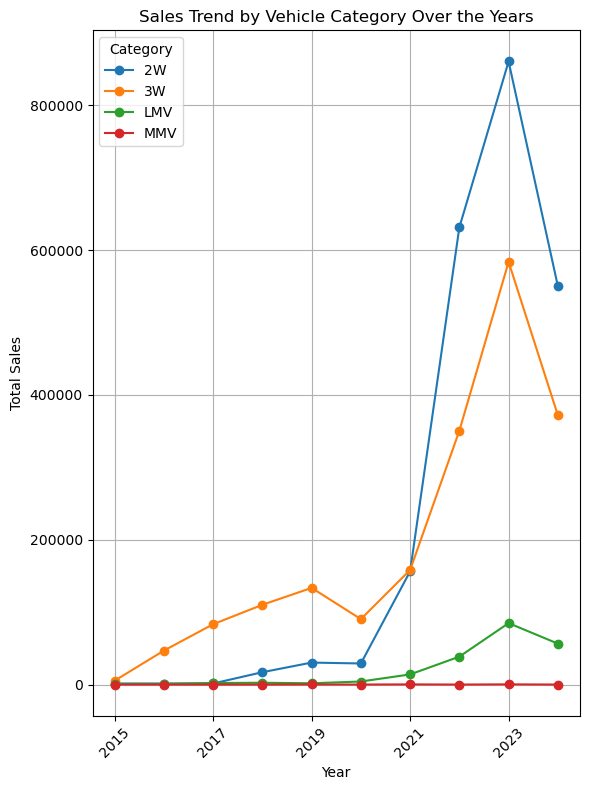

In [11]:
# Plot the data
sales_summary.T.plot(kind='line', marker='o', figsize=(6, 8))

plt.title('Sales Trend by Vehicle Category Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. 2W:
* Growth: Sales show a dramatic increase from 1,439 in 2015 to 550,351 in 2024.
* Trend: Rapid growth starting in 2018, peaking in 2023.
2. 3W:
* Growth: Sales have fluctuated significantly, rising from 5,415 in 2015 to 372,016 in 2024.
* Trend: A strong peak in 2022, with fluctuations in between.
3. LMV:
* Growth: Sales increased from 892 in 2015 to 56,537 in 2024.
* Trend: Steady growth with a notable rise starting in 2020.
4. MMV:
* Growth: Sales are relatively low, starting from 6 in 2015 and reaching 39 in 2024.
* Trend: Sales are relatively stable with minor fluctuations.

<B>Summary</B>:
1. 2W: Shows the highest growth with substantial peaks in recent years.
2. 3W: High growth with some fluctuations, peaking in 2022.
3. LMV: Steady growth with significant increases starting in 2020.
4. MMV: Minimal growth and stable sales over the years

In [12]:
len(df1['Maker'].unique())

1196

* we have 1196 unique makers in our dataset

In [13]:
# we want to see top 5 makers who has made most sales over the years and category

In [14]:
# Calculate total sales per maker
df_makers_total_sales = df1.set_index('Maker').sum(axis=1)
df_makers_total_sales

Maker
"VOLVO GROUP INDIA PVT LTD"                          43
3EV INDUSTRIES PVT LTD                             1098
3GB TECHNOLOGY PVT LTD                                1
3GB TECHNOLOGY PVT LTD                                2
3S INDUSTRIES PRIVATE LIMITED                      1069
                                                   ... 
ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH)            75
ZHEJIANG TIANYING  (IMPORTER: NEWTRON ELECTRIC)      70
ZHONGHUALONG (IMPORTER: POWORO PVT LTD)              54
ZHONGXING (IMPORTER:GREENO AUTOMOBILE)                5
ZOHAN TRADERS AND BIG METRO                         210
Length: 1386, dtype: int64

In [15]:
#  top 5 makers by total sales
top_5_makers = df_makers_total_sales.nlargest(5)

print(top_5_makers)

Maker
OLA ELECTRIC TECHNOLOGIES PVT LTD    588266
TVS MOTOR COMPANY LTD                318227
ATHER ENERGY PVT LTD                 236387
HERO ELECTRIC VEHICLES PVT. LTD      201647
OKINAWA AUTOTECH PVT LTD             196176
dtype: int64


* Market Leaders: OLA ELECTRIC TECHNOLOGIES PVT LTD stands out with the highest sales.
* Competitive Landscape: The remaining top makers also show strong sales figures, indicating a competitive market.

In [16]:

top_5_makers_list = top_5_makers.index
df_top_5 = df1[df1['Maker'].isin(top_5_makers_list)]

# category-wise sales for each of the top 5 makers
category_sales = df_top_5.groupby(['Maker', 'Cat']).sum().reset_index()

#category-wise sales for each top 5 maker
for maker in top_5_makers_list:
    print(f"\nCategory-wise Sales for {maker}:")
    maker_data = category_sales[category_sales['Maker'] == maker]
    print(maker_data.set_index('Cat').drop(columns='Maker').T)


Category-wise Sales for OLA ELECTRIC TECHNOLOGIES PVT LTD:
Cat       2W
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021     240
2022  109398
2023  267355
2024  211273

Category-wise Sales for TVS MOTOR COMPANY LTD:
Cat       2W  3W
2015     165   2
2016     171   6
2017      69   6
2018      23   3
2019      30   0
2020     233   0
2021    5258   0
2022   47182   5
2023  166580  97
2024   98516  99

Category-wise Sales for ATHER ENERGY PVT LTD:
Cat       2W
2015       0
2016       0
2017       0
2018      24
2019    2291
2020    3052
2021   15930
2022   51808
2023  104735
2024   58547

Category-wise Sales for HERO ELECTRIC VEHICLES PVT. LTD:
Cat      2W  3W
2015      1   0
2016     34   0
2017    162  72
2018   5785  47
2019  11155  15
2020   8247   0
2021  46260   3
2022  97828   1
2023  29964   0
2024   2211   0

Category-wise Sales for OKINAWA AUTOTECH PVT LTD:
Cat       2W  3W  LMV
2015       0   0    0
2016       1   0    0
2017     331   0    0

### Dataset 2 - State-wise Sales

In [17]:
df2 = pd.read_csv('RS_Session_256_AU_95_C.csv')


In [18]:
df2.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


* Features
1. State Name: The name of the state and Union territories where the vehicle sales data is recorded.
2. Two Wheeler: The number of two-wheeler vehicles (e.g., motorcycles, scooters) sold in the state.
3. Three Wheeler: e.g., auto rickshaws , tempo.
4. Four Wheeler:e.g., cars, SUVs.
5. Goods Vehicles: The number of vehicles primarily used for transporting goods sold in the state.
6. Public Service Vehicle: e.g., buses, taxis.
7. Special Category Vehicles: e.g., luxury vehicles
8. Ambulance/Hearses: The number of ambulances and hearses sold in the state.
9. Construction Equipment Vehicle: e.g., bulldozers, cranes
10. Other: The number of vehicles that do not fit into the above categories sold in the state.
11. Grand Total: The total number of all types of vehicles sold in the state.

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State Name                      33 non-null     object 
 1   Two Wheeler                     33 non-null     int64  
 2   Three Wheeler                   29 non-null     float64
 3   Four Wheeler                    33 non-null     int64  
 4   Goods Vehicles                  29 non-null     float64
 5   Public Service Vehicle          25 non-null     float64
 6   Special Category Vehicles       10 non-null     float64
 7   Ambulance/Hearses               6 non-null      float64
 8   Construction Equipment Vehicle  6 non-null      float64
 9   Other                           29 non-null     float64
 10  Grand Total                     33 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 3.0+ KB


* This dataset contains :
1.  9 types of EV Vehicle 
2.  26 states and 6 Union Territories

In [20]:
# data cleaning

In [21]:
df2.isnull().sum()

State Name                         0
Two Wheeler                        0
Three Wheeler                      4
Four Wheeler                       0
Goods Vehicles                     4
Public Service Vehicle             8
Special Category Vehicles         23
Ambulance/Hearses                 27
Construction Equipment Vehicle    27
Other                              4
Grand Total                        0
dtype: int64

In [22]:
# replace null values with 0
df2 = df2.fillna(0)

In [23]:
df2.duplicated().sum()

0

* No duplicates

In [24]:
# Summary statistics
print(df2.describe())



         Two Wheeler  Three Wheeler  Four Wheeler  Goods Vehicles  \
count      33.000000      33.000000     33.000000        33.00000   
mean    17123.757576   39223.393939   1596.060606       184.00000   
std     49890.139178  119445.380804   4732.596387       585.02564   
min         1.000000       0.000000      2.000000         0.00000   
25%        69.000000      32.000000     14.000000         2.00000   
50%      2540.000000    2115.000000    139.000000        11.00000   
75%     10329.000000   18595.000000    709.000000        35.00000   
max    282542.000000  647186.000000  26335.000000      3036.00000   

       Public Service Vehicle  Special Category Vehicles  Ambulance/Hearses  \
count               33.000000                  33.000000          33.000000   
mean               123.575758                  24.848485           0.363636   
std                378.817488                  91.416670           1.112940   
min                  0.000000                   0.000000      

### sales by state

In [25]:
# dataframe without last row of grant total (only states)
df2_state = df2[df2['State Name'] != 'Grand Total']
df2_state

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0,13428
6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0,132302
7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0,1686
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0,17593
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0,26780


In [26]:
df2_state = df2_state[['State Name','Grand Total']].sort_values(by='Grand Total', ascending=False)
df2_state 

,State Name,Grand Total
29,Uttar Pradesh,276217
6,Delhi,132302
13,Karnataka,82046
3,Bihar,64241
16,Maharashtra,58815
24,Rajasthan,53141
26,Tamil Nadu,50296
2,Assam,47947
31,West Bengal,44291
9,Haryana,26780


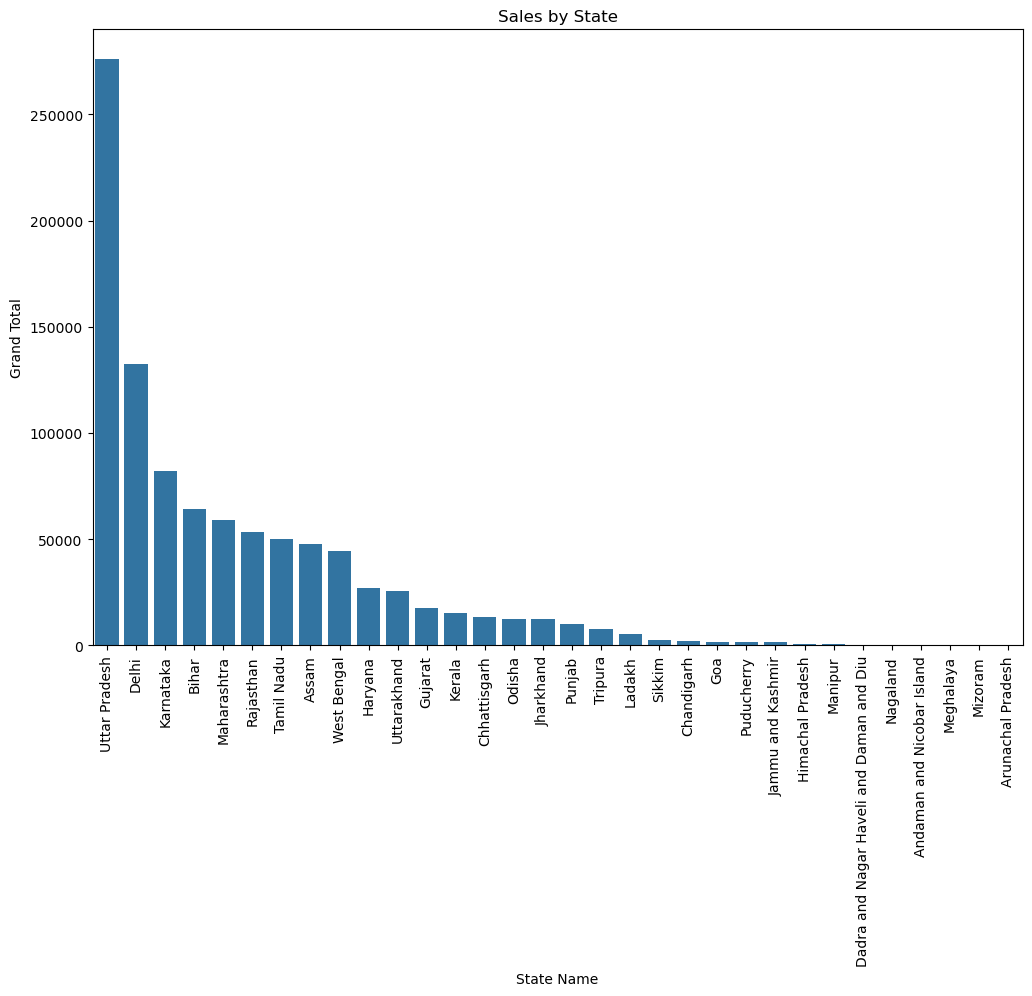

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df2_state, x='State Name', y='Grand Total')
plt.xticks(rotation=90)
plt.title('Sales by State')
plt.show()

* Top 5 states with most sales in all types of EVs
   
1. Uttar Pradesh --	276217
2. Delhi	    --   132302
3. Karnataka   -- 	82046
4. Bihar	   --   64241
5. Maharashtra	--    58815


### Sales By  Categories

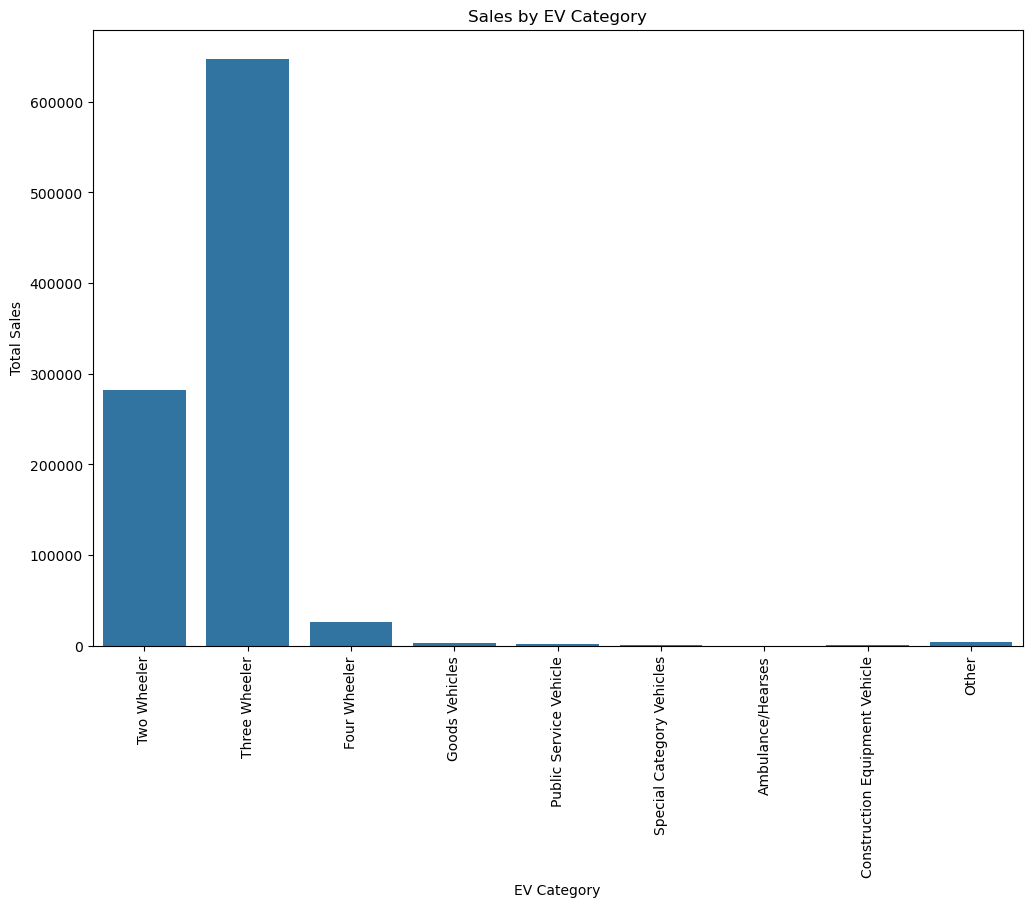

In [28]:
df2_cat = df2.drop(columns=['Grand Total'])
# Extract the row where 'State Name' is 'Grand Total'
grand_total_row = df2_cat[df2_cat['State Name'] == 'Grand Total'].iloc[0]

# Drop the 'State Name' column to keep only the EV categories
grand_total_values = grand_total_row.drop('State Name')

# Convert the Series to a DataFrame for plotting
grand_total_df = pd.DataFrame({
    'Category': grand_total_values.index,
    'Total Sales': grand_total_values.values
})

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=grand_total_df, x='Category', y='Total Sales')
plt.xticks(rotation=90)
plt.title('Sales by EV Category')
plt.xlabel('EV Category')
plt.ylabel('Total Sales')
plt.show()

In [29]:
# lets analyse each category seperatly

In [30]:
df2.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931


In [31]:
# remove grand total column and row for better results
df2_cleaned = df2.iloc[:-1, :-1]
df2_cleaned

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0
5,Chhattisgarh,6424,5341.0,117,1077.0,1.0,0.0,0.0,368.0,100.0
6,Delhi,14730,112831.0,3051,49.0,39.0,0.0,0.0,0.0,1602.0
7,Goa,1314,28.0,289,13.0,36.0,2.0,0.0,0.0,4.0
8,Gujarat,13662,1869.0,1309,28.0,278.0,344.0,0.0,26.0,77.0
9,Haryana,7777,18595.0,186,122.0,8.0,2.0,0.0,0.0,90.0


### 1. Two wheeler

In [32]:
df2_cleaned['Two Wheeler'].describe()

count       32.000000
mean      8829.437500
std      15027.420445
min          1.000000
25%         68.500000
50%       1984.500000
75%      10306.500000
max      56737.000000
Name: Two Wheeler, dtype: float64

In [33]:
two_wheeler_stats = df2_cleaned['Two Wheeler'].groupby(df2['State Name']).sum().sort_values(ascending = False)
two_wheeler_stats

State Name
Karnataka                                   56737
Maharashtra                                 51149
Tamil Nadu                                  44302
Rajasthan                                   23446
Uttar Pradesh                               18295
Delhi                                       14730
Gujarat                                     13662
Odisha                                      10329
Kerala                                      10299
Haryana                                      7777
Chhattisgarh                                 6424
Punjab                                       6408
Bihar                                        5003
Jharkhand                                    2961
Uttarakhand                                  2614
West Bengal                                  2540
Puducherry                                   1429
Jammu and Kashmir                            1417
Goa                                          1314
Assam                                  

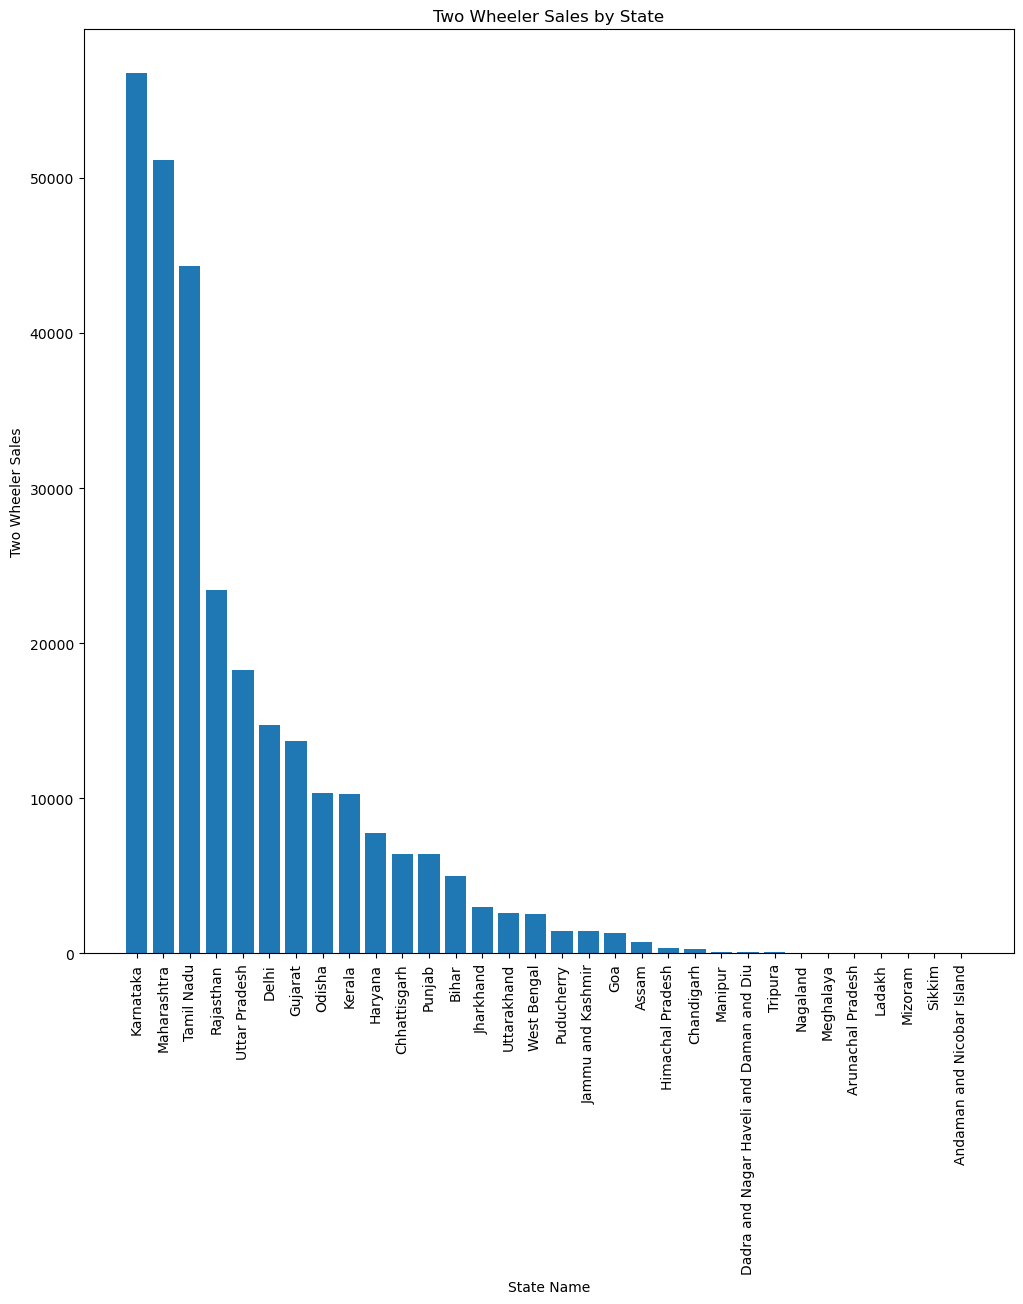

In [34]:
plt.figure(figsize=(12, 12))
plt.bar(x= two_wheeler_stats.index , height = two_wheeler_stats.values)
plt.xlabel('State Name')
plt.ylabel('Two Wheeler Sales')
plt.title('Two Wheeler Sales by State')
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.show()

* Karnataka has the highes two wheeler (scooty , bikes)sales appprox 56000
* top 5 states with highest two wheeler sales :
1. Karnataka                                   56737
2. Maharashtra                                 51149
3. Tamil Nadu                                  44302
4. Rajasthan                                   23446
5. Uttar Pradesh                               18295

### 3.Three wheeler

In [35]:
df2_cleaned['Three Wheeler'].describe()

count        32.000000
mean      20224.562500
std       49311.798762
min           0.000000
25%          31.500000
50%        1992.000000
75%       17007.250000
max      257159.000000
Name: Three Wheeler, dtype: float64

In [36]:
three_wheeler_stats = df2_cleaned['Three Wheeler'].groupby(df2['State Name']).sum().sort_values(ascending = False)
three_wheeler_stats

State Name
Uttar Pradesh                               257159.0
Delhi                                       112831.0
Bihar                                        59079.0
Assam                                        47041.0
West Bengal                                  40948.0
Rajasthan                                    29631.0
Uttarakhand                                  22096.0
Haryana                                      18595.0
Karnataka                                    16478.0
Jharkhand                                     8986.0
Tripura                                       7510.0
Maharashtra                                   6155.0
Chhattisgarh                                  5341.0
Tamil Nadu                                    4470.0
Punjab                                        2878.0
Kerala                                        2115.0
Gujarat                                       1869.0
Odisha                                        1808.0
Chandigarh                         

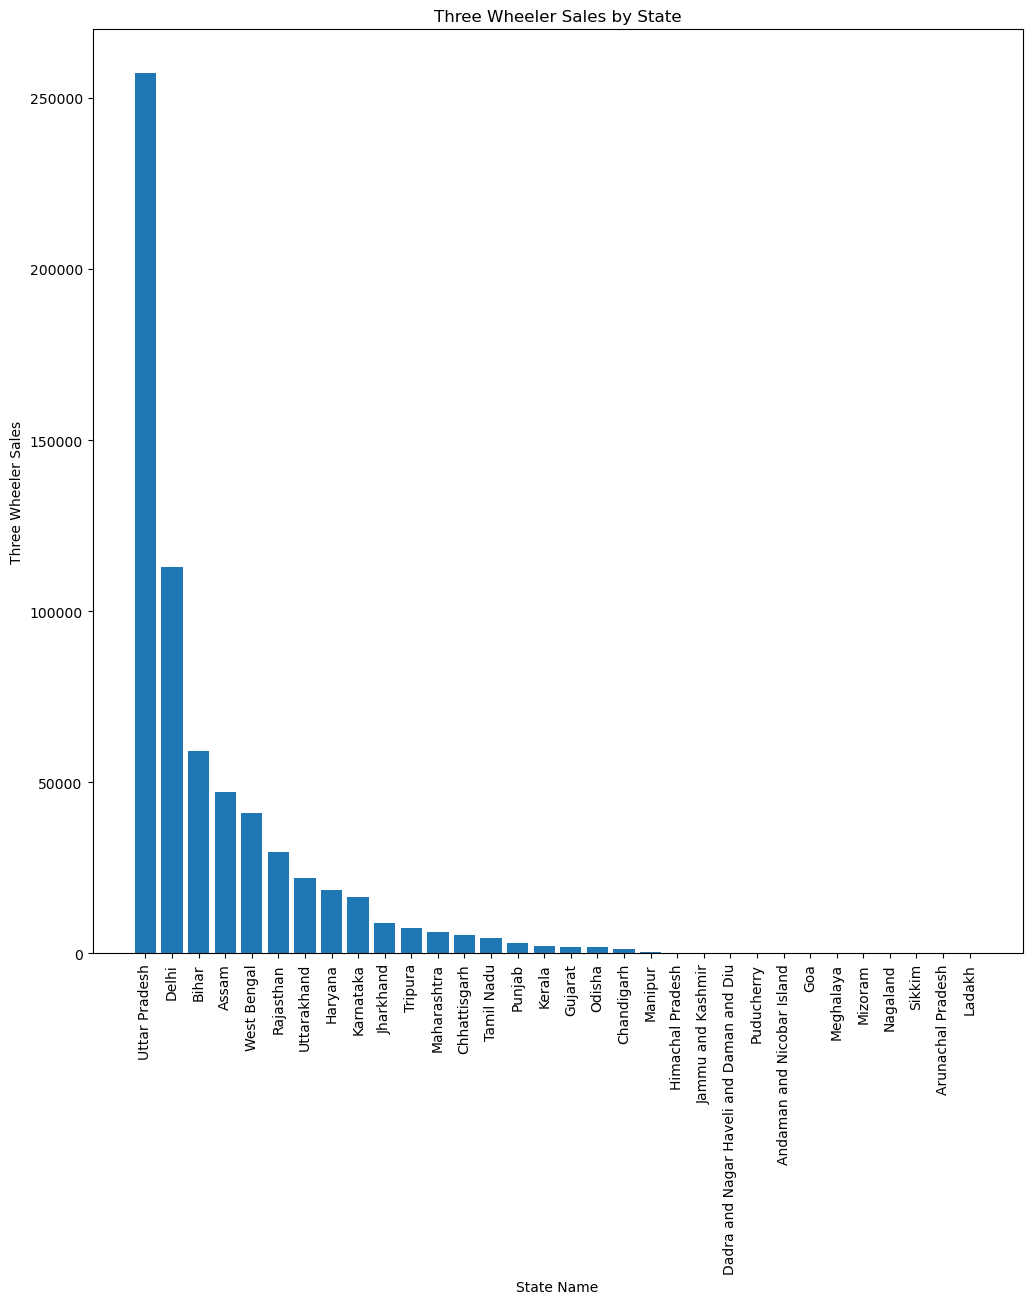

In [37]:
plt.figure(figsize=(12, 12))
plt.bar(x= three_wheeler_stats.index , height = three_wheeler_stats.values)
plt.xlabel('State Name')
plt.ylabel('Three Wheeler Sales')
plt.title('Three Wheeler Sales by State')
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.show()

* Uttar Pradesh has highest sales in three wheelers approx 2 lakhs 57 thousand
* top 5 states with highest three wheeler (auto rikshaw , tempo etc) sales :
1. Uttar Pradesh                               257159.0
2. Delhi                                       112831.0
3. Bihar                                        59079.0
4. Assam                                        47041.0
5. West Bengal                                  40948.0

# 3. Four Wheeler

In [38]:
df2_cleaned['Four Wheeler'].describe()

count      32.00000
mean      822.96875
std      1661.50339
min         2.00000
25%        13.75000
50%       131.50000
75%       638.50000
max      7212.00000
Name: Four Wheeler, dtype: float64

* on average 23000 four wheelers gets sold in india

In [39]:
Four_wheeler_stats = df2_cleaned['Four Wheeler'].groupby(df2['State Name']).sum().sort_values(ascending = False)
Four_wheeler_stats

State Name
Karnataka                                   7212
Ladakh                                      5484
Delhi                                       3051
Kerala                                      2524
Sikkim                                      2414
Gujarat                                     1309
Punjab                                       798
Uttarakhand                                  709
West Bengal                                  615
Uttar Pradesh                                368
Goa                                          289
Haryana                                      186
Chandigarh                                   182
Assam                                        161
Dadra and Nagar Haveli and Daman and Diu     153
Jharkhand                                    139
Puducherry                                   124
Nagaland                                     121
Chhattisgarh                                 117
Bihar                                        114
Andaman a

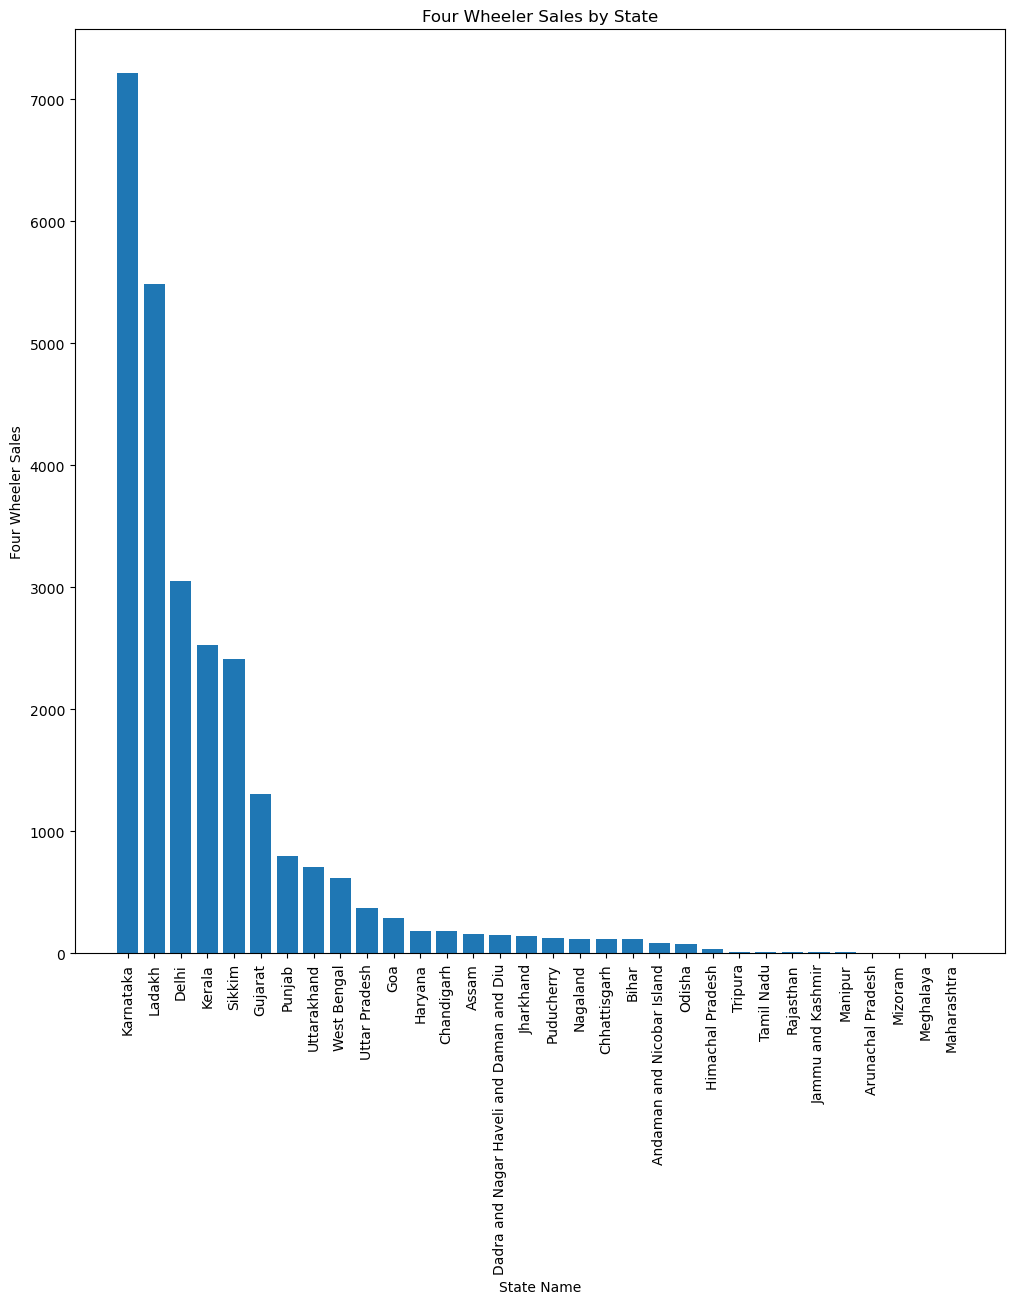

In [40]:
plt.figure(figsize=(12, 12))
plt.bar(x= Four_wheeler_stats.index , height = Four_wheeler_stats.values)
plt.xlabel('State Name')
plt.ylabel('Four Wheeler Sales')
plt.title('Four Wheeler Sales by State')
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.show()

* Karnataka has highest sales in Four wheelers approx 7000.
* top 5 states with highest four wheeler (car , SUV etc) sales :
1. Karnataka                                   7212
2. Ladakh                                      5484
3. Delhi                                       3051
4. Kerala                                      2524
5. Sikkim                                      2414

In [41]:
# lets check statewise sales of all categoris together

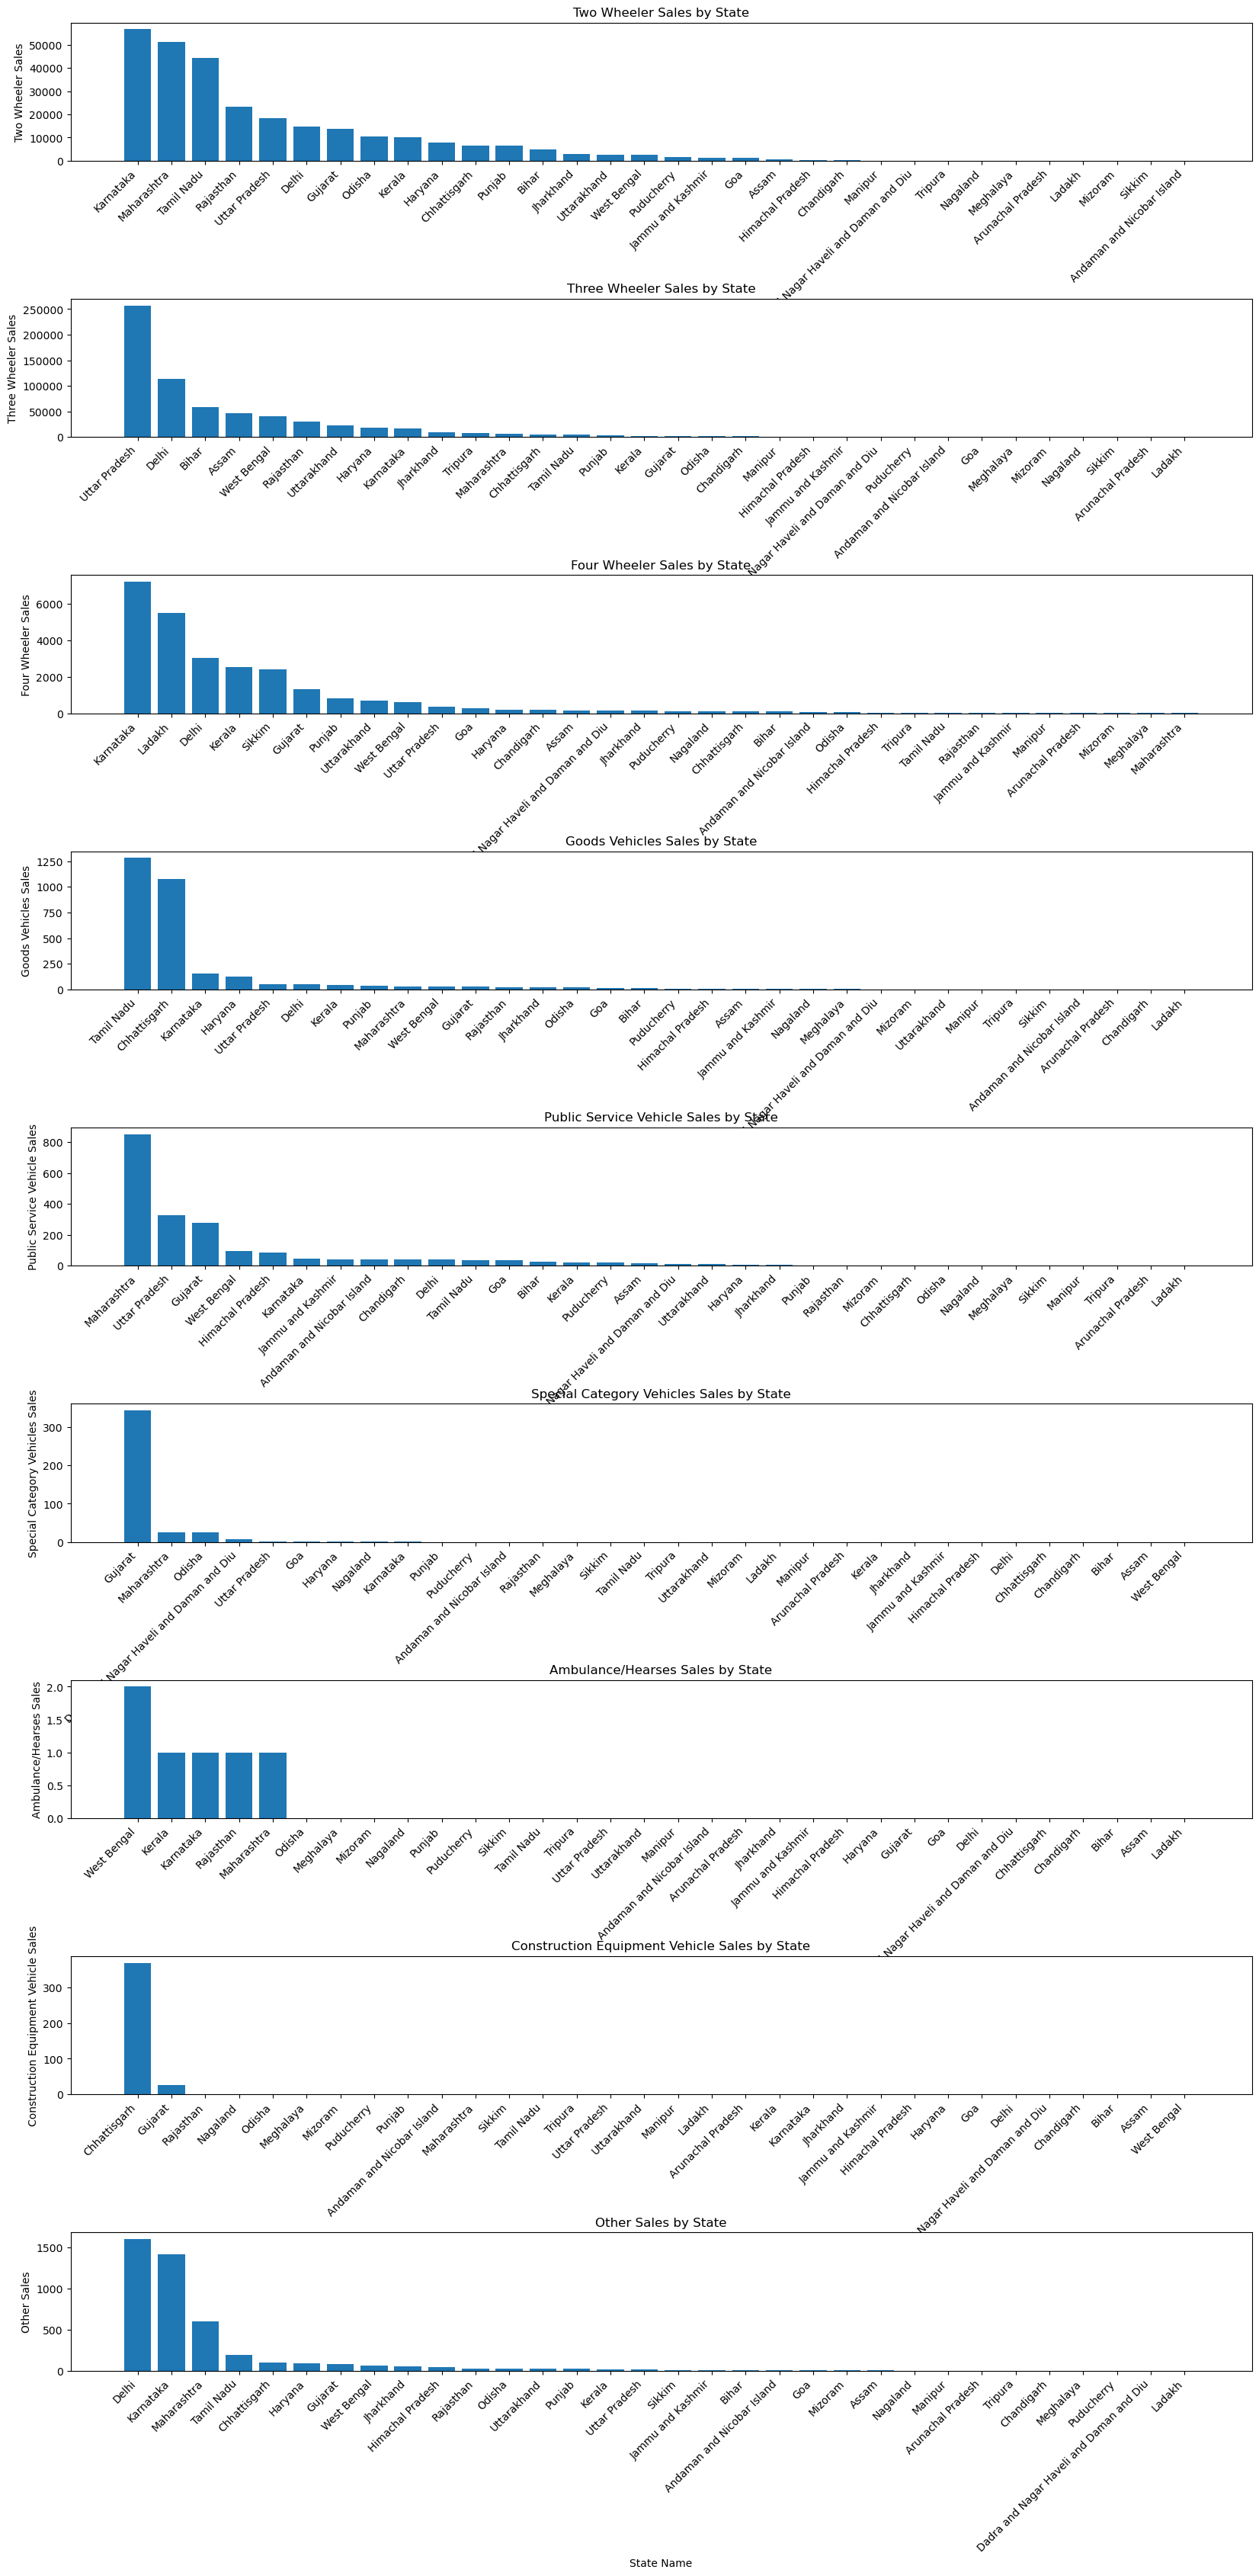

In [42]:

ev_categories = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles', 
                 'Ambulance/Hearses', 'Construction Equipment Vehicle','Other']


plt.figure(figsize=(20, 40))  


for i, category in enumerate(ev_categories, 1):
    category_stats = df2_cleaned[category].groupby(df2_cleaned['State Name']).sum().sort_values(ascending=False)
    category_stats = category_stats.drop('Grand Total', errors='ignore') 
    
    plt.subplot(len(ev_categories), 1, i)
    plt.bar(x=category_stats.index, height=category_stats.values)
    plt.xlabel('State Name')
    plt.ylabel(f'{category} Sales')
    plt.title(f'{category} Sales by State')
    plt.xticks(rotation=45, ha='right', fontsize=10)  


plt.subplots_adjust(hspace=1.0)  


plt.show()


### Dataset 3 - Charging dataset analysis

In [43]:
df3 = pd.read_csv("RS_Session_258_AU_1241_2.i.csv")
df3.head()

,State/UT,No. of Electric Vehicle (EV) Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [45]:
df3

,State/UT,No. of Electric Vehicle (EV) Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


In [46]:
df3 = df3[df3['State/UT'] != 'Total']

In [47]:
df3

,State/UT,No. of Electric Vehicle (EV) Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


In [48]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   State/UT                                          25 non-null     object
 1   No. of Electric Vehicle (EV) Chargers Sanctioned  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes
None


In [49]:
print(df3.describe())

       No. of Electric Vehicle (EV) Chargers Sanctioned
count                                         25.000000
mean                                         115.080000
std                                          105.731941
min                                           10.000000
25%                                           25.000000
50%                                           70.000000
75%                                          207.000000
max                                          317.000000


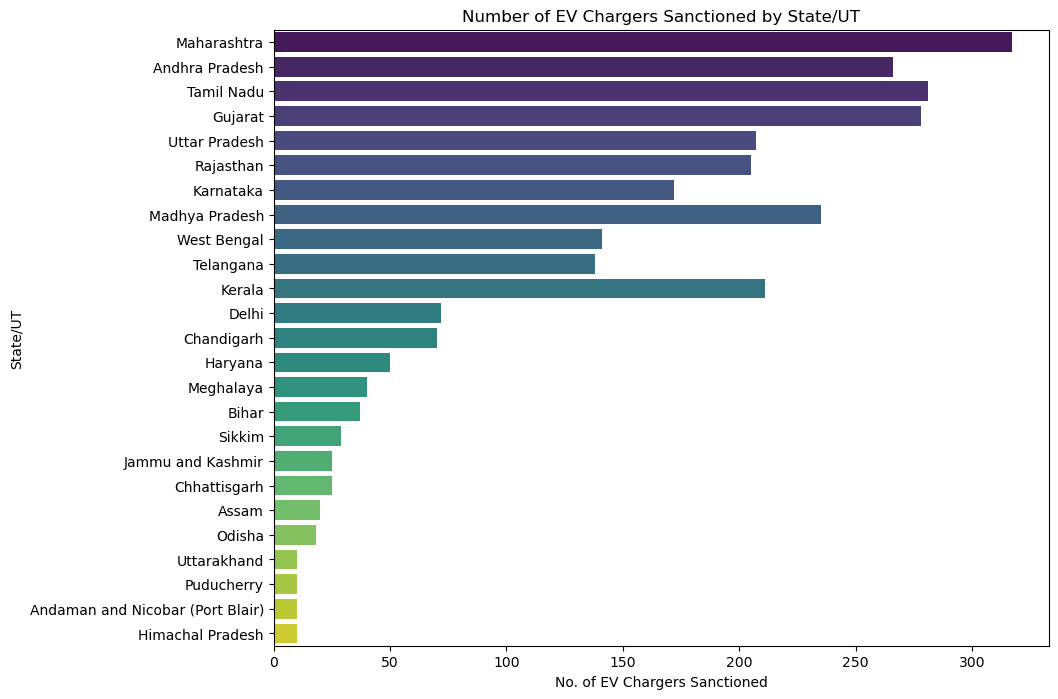

In [50]:
plt.figure(figsize=(10, 8))
sns.barplot(x='No. of Electric Vehicle (EV) Chargers Sanctioned', y='State/UT', data=df3, palette='viridis')
plt.title('Number of EV Chargers Sanctioned by State/UT')
plt.xlabel('No. of EV Chargers Sanctioned')
plt.ylabel('State/UT')
plt.show()


In [51]:
df3_top5 = df3.sort_values(by='No. of Electric Vehicle (EV) Chargers Sanctioned' , ascending = False)
df3_top5 = df3_top5.head(5)
df3_top5

,State/UT,No. of Electric Vehicle (EV) Chargers Sanctioned
0,Maharashtra,317
2,Tamil Nadu,281
3,Gujarat,278
1,Andhra Pradesh,266
7,Madhya Pradesh,235
